# まずはやってみる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 疑似データ作成

In [2]:
df = pd.DataFrame(data=np.random.randint(0, 101, (100, 5)), columns=['Japanese', 'Mathematics', 'English', 'Science', 'Civics'])
df.head()

,Japanese,Mathematics,English,Science,Civics
0,35,83,85,81,77
1,0,84,47,81,81
2,21,40,19,65,99
3,37,88,85,24,38
4,72,94,58,0,73


In [3]:
df['Result'] = df.T.sum() > 250
df.head()

,Japanese,Mathematics,English,Science,Civics,Result
0,35,83,85,81,77,True
1,0,84,47,81,81,True
2,21,40,19,65,99,False
3,37,88,85,24,38,True
4,72,94,58,0,73,True


In [4]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
df['Result'] = lbl.fit_transform(list(df['Result'].values))
df.head()

,Japanese,Mathematics,English,Science,Civics,Result
0,35,83,85,81,77,1
1,0,84,47,81,81,1
2,21,40,19,65,99,0
3,37,88,85,24,38,1
4,72,94,58,0,73,1


### データフレームに格納

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns=['Result'])
y = df['Result']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### モデルを生成(ランダムフォレスト)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)

### 学習

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### スコア出力

In [11]:
model.score(X_test, y_test)

0.8

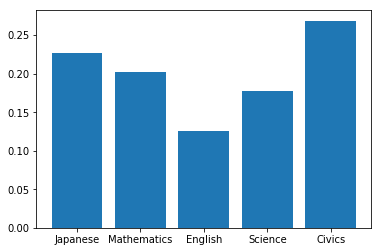

In [12]:
importances = model.feature_importances_
plt.figure()
plt.bar(df.columns.drop('Result'), importances)
plt.show()